<a href="https://colab.research.google.com/github/mteix/LoRaUnicamp/blob/main/Teste_IC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [28]:
!pip install geopy

In [29]:
from geopy import distance
LatAntena = -22.561772
LongAntena = -47.1124523

In [30]:
df = pd.read_excel('TESTE1 (1).xlsx')
df = df.drop(["Teste 1","Lat", "Long"], axis=1)
df.head()

,RSSI1,RSSI2,RSSI3,RSSI4,RSSI5,RSSI6,RSSI7,RSSI8,RSSI9,RSSI10,...,RSSI16,RSSI17,RSSI18,RSSI19,RSSI20,RSSI21,Media,dp,Dist,D
0,-68,-68,-69,-67,-66,-66,-67,-68,-68,-70,...,-67.0,-69.0,-70.0,-69.0,-70.0,-70.0,-68,1,32.069,0.069
1,-79,-79,-79,-81,-78,-78,-78,-76,-76,-77,...,NaN,NaN,NaN,NaN,NaN,NaN,-78,1,32.083,0.083
2,-84,-85,-84,-87,-86,-89,-85,-87,-84,-83,...,-83.0,-82.0,-79.0,-84.0,-83.0,-82.0,-84,2,32.092,0.092
3,-91,-88,-86,-91,-86,-86,-90,-84,-91,-84,...,-93.0,-90.0,-91.0,-93.0,-91.0,-85.0,-88,3,32.105,0.105
4,-89,-86,-86,-90,-89,-89,-89,-88,-88,-88,...,-90.0,-89.0,-89.0,-90.0,-90.0,-89.0,-89,1,32.119,0.119


In [31]:
import plotly.express as px
fig1 = px.scatter(df, x="Dist", y="Media", title="Media vs Distance")
fig1.show()

fig2 = px.scatter(df, x="D", y="Media", title="Media vs D")
fig2.show()


R-squared for Media vs log(Dist): 0.9593938928528131
R-squared for Media vs log(D): 0.9640626278784504


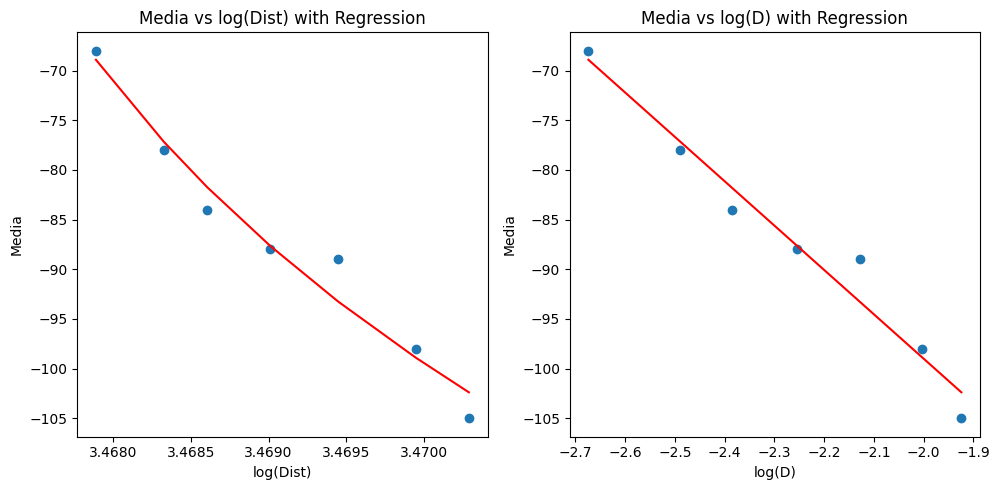

In [34]:
df['log_Dist'] = np.log(df['Dist'])
X = df[['log_Dist']]
y = df['Media']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"R-squared for Media vs log(Dist): {r2}")


df['log_D'] = np.log(df['D'])
X = df[['log_D']]
y = df['Media']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"R-squared for Media vs log(D): {r2}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['log_Dist'], df['Media'])
plt.plot(df['log_Dist'], y_pred, color='red')
plt.xlabel('log(Dist)')
plt.ylabel('Media')
plt.title('Media vs log(Dist) with Regression')

plt.subplot(1, 2, 2)
plt.scatter(df['log_D'], df['Media'])
plt.plot(df['log_D'], y_pred, color='red')
plt.xlabel('log(D)')
plt.ylabel('Media')
plt.title('Media vs log(D) with Regression')

plt.tight_layout()
plt.show()


R-squared for Media vs Dist (Polynomial Regression): 0.9621117507498205


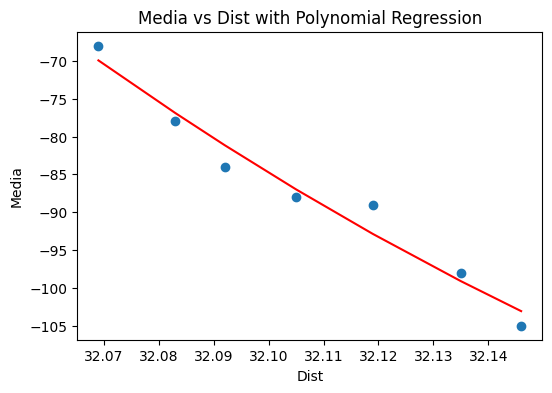

R-squared for Media vs D (Polynomial Regression): 0.9621117507483451


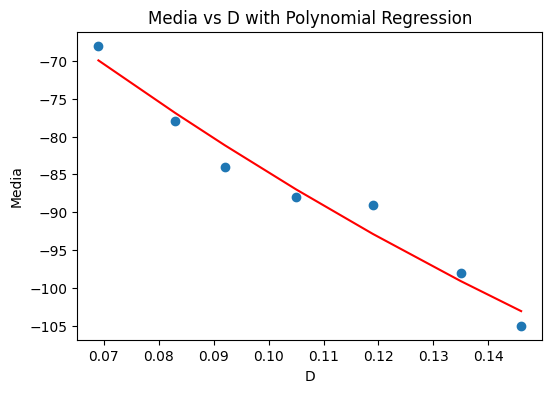

In [33]:
y = df['Media']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)
r2 = r2_score(y, y_pred)

print(f"R-squared for Media vs Dist (Polynomial Regression): {r2}")


plt.figure(figsize=(6, 4))
plt.scatter(df['Dist'], df['Media'])
plt.plot(df['Dist'], y_pred, color='red')
plt.xlabel('Dist')
plt.ylabel('Media')
plt.title('Media vs Dist with Polynomial Regression')
plt.show()

X = df[['D']]
y = df['Media']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)
r2 = r2_score(y, y_pred)

print(f"R-squared for Media vs D (Polynomial Regression): {r2}")

plt.figure(figsize=(6, 4))
plt.scatter(df['D'], df['Media'])
plt.plot(df['D'], y_pred, color='red')
plt.xlabel('D')
plt.ylabel('Media')
plt.title('Media vs D with Polynomial Regression')
plt.show()
